In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(".\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [6]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [7]:
gbm_params = {"max_depth": [0,3,5,8,10,15], "max_leaf_nodes": [0,3,5,10,15,20], "min_samples_split": [2,4,7,10],
              "n_estimators": [50,100,150,200,300] }

In [8]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2716 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 3156 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 3521 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 4590 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5741 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6972 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  2.6min finished


In [9]:
gbm_cv_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 5,
 'min_samples_split': 4,
 'n_estimators': 200}

In [46]:
gbm_tuned = GradientBoostingClassifier(max_depth = 5, max_leaf_nodes = 3, min_samples_split = 4, n_estimators = 100).fit(X_train, y_train)

In [47]:
y_pred = gbm_tuned.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.7748917748917749

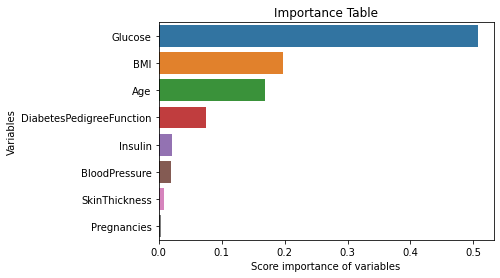

In [50]:
feature_imp = pd.Series(gbm_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
import seaborn as sns

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Score importance of variables")
plt.ylabel("Variables")
plt.title("Importance Table")
plt.show()